# Análisis y obtención de las matrices Word-Context y TfIdf

---
## Instalación de paquetes

In [ ]:
# Permite obtener las stop_words de los idiomas soportados
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp37-none-any.whl size=32917 sha256=f78973dbb52419b8f9099d67b19bcd3840c29f529cae35d3b8e72f09d2c2c497
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


## Librerías

In [ ]:
#  para construir gráficas y realizar análisis exploratorio de los datos
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

# para cargar datos y realizar pre-procesamiento básico
import pandas as pd
from collections import Counter

# para pre-procesamiento del texto y extraer características
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from nltk.stem.snowball import SpanishStemmer
from stop_words import get_stop_words # Se añade librería para obtener las stop_word de cualquier idioma

# algoritmos de clasificación
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# para construir pipelines
from sklearn.pipeline import Pipeline

# para evaluar los modelos 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.multiclass import unique_labels

# para guardar el modelo
import pickle

### ENSEMBLES ###
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

---
## Funciones útiles

In [ ]:
!wget "https://raw.githubusercontent.com/jibt1/competition_group/main/Tareas/datasets/more_stop_words.txt"

--2021-05-15 14:21:43--  https://raw.githubusercontent.com/jibt1/competition_group/main/Tareas/datasets/more_stop_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10258 (10K) [application/octet-stream]
Saving to: ‘more_stop_words.txt’

more_stop_words.txt 100%[===================>]  10.02K  --.-KB/s    in 0.001s  

2021-05-15 14:21:43 (14.5 MB/s) - ‘more_stop_words.txt’ saved [10258/10258]



In [ ]:
# Se obtienen las stop_words en español

with open("more_stop_words.txt", "rb") as f:
  list_test = pickle.load(f)

stop_words = get_stop_words("spanish")
more_stop_words = stop_words + list_test
more_stop_words.sort()


more_stop_words

['00',
 '000',
 '0000000001',
 '00000001',
 '000001',
 '000010',
 '0055flor',
 '007',
 '00am',
 '01',
 '01151745',
 '018004337615',
 '02',
 '020',
 '021',
 '0212308',
 '0244',
 '0261',
 '02810',
 '03',
 '032015',
 '04',
 '04141326606',
 '0416',
 '044',
 '05',
 '0500',
 '056',
 '057',
 '06',
 '062017',
 '0697',
 '07',
 '072',
 '08',
 '0800saludy',
 '0820',
 '087',
 '09',
 '091',
 '0lizz0',
 '0mm',
 '0xfff',
 '10',
 '100',
 '1000',
 '10000',
 '100000000',
 '1000c',
 '1002',
 '1004',
 '1008',
 '100tc',
 '101',
 '102',
 '103',
 '104',
 '107',
 '108',
 '1096',
 '10an',
 '10cancionesperfect',
 '10defectosmi',
 '10diasdeoraca',
 '10mil',
 '10paisesquequieroconoc',
 '10rts',
 '10x10',
 '10y',
 '11',
 '1100',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '11pm',
 '11th',
 '12',
 '120',
 '1200',
 '122',
 '1234',
 '1273828',
 '12pm',
 '13',
 '131',
 '133',
 '134',
 '137',
 '139',
 '1390',
 '13am',
 '14',
 '140',
 '1400',
 '1408',
 '14159',
 '1416',
 '142',
 '146',
 '14defebrer',
 '14k'

In [ ]:
%%capture
!pip install autocorrect

In [ ]:
from autocorrect import Speller
spell = Speller(lang='es', fast=False)
print(spell('varco'))

marco


In [ ]:
%%capture
!pip install SpellChecker
!pip install pyspellchecker
from spellchecker import SpellChecker

     |████████████████████████████████| 2.7MB 4.1MB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
spell_check  = SpellChecker(language='es', distance=1)
spell_check.correction("varco")

'barco'

In [ ]:
# función auxiliar utilizada por CountVectorizer para procesar las frases
def spanish_stemmer(sentence):
    stemmer = SpanishStemmer()
    analyzer = CountVectorizer(binary=False, analyzer='word', stop_words=more_stop_words,
                               ngram_range=(1, 1)).build_analyzer()
    return (stemmer.stem(word) for word in analyzer(sentence))

i = 0
def spanish_stemmer(sentence):
    global i
    stemmer = SpanishStemmer()
    spell_check  = SpellChecker(language='es', distance=1)
    analyzer = CountVectorizer(binary=False, analyzer='word', stop_words=stop_words,
                               ngram_range=(1, 1)).build_analyzer()
    i += 1
    print(i)
    return (stemmer.stem(spell_check.correction(word)) for word in analyzer(sentence))

i = 0
def spanish_stemmer(sentence):
    global i
    stemmer = SpanishStemmer()
    spell_check  = Speller(lang='es', fast=False)
    analyzer = CountVectorizer(binary=False, analyzer='word', stop_words=stop_words,
                               ngram_range=(1, 1)).build_analyzer()
    i += 1
    print(i)
    return (stemmer.stem(spell_check(word)) for word in analyzer(sentence))

# guarda un pipeline entrenado
def save_model(model, modelName = "pickle_model.pkl"):
   pkl_filename = modelName
   with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)   


# carga un pipeline entrenado y guardado previamente
def load_model(rutaModelo = "pickle_model.pkl"):
  # Load from file
  with open(rutaModelo, 'rb') as file:
    pickle_model = pickle.load(file)
    return pickle_model 


# función auxiliar para realizar predicciones con el modelo
def predict_model(model, data, pref='m'):
  """
  data: list of the text to predict
  pref: identificador para las columnas (labels_[pref], scores_[pref]_[class 1], etc.)
  """
  res = {}
  scores = None
  labels = model.predict(data)

  if hasattr(model, 'predict_proba'):
    scores = model.predict_proba(data)
  
    # empaquetar scores dentro de un diccionario que contiene labels, scores clase 1, scores clase 2, .... El nombre de la clase se normaliza a lowercase
    res = {f'scores_{pref}_{cls.lower()}':score for cls, score in zip(model.classes_, [col for col in scores.T])}

  # añadir datos relativos a la predicción
  res[f'labels_{pref}'] = labels

  # convertir a dataframe ordenando las columnas primero el label y luego los scores por clase, las clases ordenadas alfabeticamente.
  res = pd.DataFrame(res, columns=sorted(list(res.keys())))

  return res


# función auxiliar que evalúa los resultados de una clasificación
def evaluate_model(y_true, y_pred, y_score=None, pos_label='positive'):
  """
  
  """
  print('==== Sumario de la clasificación ==== ')
  print(classification_report(y_true, y_pred))

  print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_true, y_pred)))

  # graficar matriz de confusión
  display_labels = sorted(unique_labels(y_true, y_pred), reverse=True)
  cm = confusion_matrix(y_true, y_pred, labels=display_labels)

  z = cm[::-1]
  x = display_labels
  y =  x[::-1].copy()
  z_text = [[str(y) for y in x] for x in z]

  fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

  fig_cm.update_layout(
      height=400, width=400,
      showlegend=True,
      margin={'t':150, 'l':0},
      title={'text' : 'Matriz de Confusión', 'x':0.5, 'xanchor': 'center'},
      xaxis = {'title_text':'Valor Real', 'tickangle':45, 'side':'top'},
      yaxis = {'title_text':'Valor Predicho', 'tickmode':'linear'},
  )
  fig_cm.show()


  # curva roc (definido para clasificación binaria)
  fig_roc = None
  if y_score is not None:
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=pos_label)
    fig_roc = px.area(
        x=fpr, y=tpr,
        title={'text' : f'Curva ROC (AUC={auc(fpr, tpr):.4f})', 'x':0.5, 'xanchor': 'center'},
        labels=dict(x='Ratio Falsos Positivos', y='Ratio Verdaderos Positivos'),
        width=400, height=400
    )
    fig_roc.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)

    fig_roc.update_yaxes(scaleanchor="x", scaleratio=1)
    fig_roc.update_xaxes(constrain='domain')
    
    fig_roc.show()

print('Done!')

Done!


---
## Carga de datos

In [ ]:
train_dataframe = pd.read_csv("https://raw.githubusercontent.com/jibt1/competition_group/main/Tareas/datasets/haha_2021_train.csv", sep=',')
train_dataframe = train_dataframe.iloc[:,:3].copy() # Obtenemos la columnas que nos interesan
train_dataframe.head()

,id,text,is_humor
0,tweet1,Niveles de retraso mental: \n\n— Bajo.\n— Medi...,1
1,tweet2,"—Vamos Luke desenfunda tu sable, demuestra tu ...",1
2,tweet3,"- ¿Te ofrezco algo?, ¿Agua, café, mi corazón, ...",1
3,tweet4,No se porqué me hago la cabeza deooos,0
4,tweet5,Quisiera saber que hago durante la siesta de l...,0


---
## Data Splitting

In [ ]:
seed = 0  # fijar random_state para reproducibilidad
class_col = 'is_humor'
train, test = train_test_split(train_dataframe, test_size=.20, stratify=train_dataframe[class_col], random_state=seed)

train.head()

,id,text,is_humor
17975,tweet17976,Me quiero re morir,0
15553,tweet15554,VAMOS A DARLE LO QUE QUIERE ENTONCES,0
9627,tweet9628,"Se como el bambu,a quien el viento y tempestad...",0
17131,tweet17132,Que prefierien para una persona cercana a uste...,0
11091,tweet11092,Excelente recupero el blok del perro ya pronto...,0


In [ ]:
train['is_humor'].value_counts()

0    11798
1     7402
Name: is_humor, dtype: int64

###Separación del target de los predictores.

In [ ]:
x_train = train['text'].copy()
y_train = train['is_humor'].copy()
x_train, X_muestra2, y_train, Y_muestra2 = train_test_split(x_train, y_train, test_size = 0.7, stratify=y_train)

---
## Matrices Word-Context y TfIdf

In [ ]:
c_vec = CountVectorizer(analyzer=spanish_stemmer, stop_words=stop_words)
tf_idf = TfidfTransformer(smooth_idf=True, use_idf=True)

In [ ]:
c_vec_mat = c_vec.fit_transform(x_train)
tf_idf_mat = tf_idf.fit_transform(c_vec_mat)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


KeyboardInterrupt: ignored

In [ ]:
"""
Each row in the array is one of your original documents (strings),
each column is a feature (word),and the element is the count for that
particular word and document. You can see that if you sum each column
you'll get the correct number
"""

"""
print(c_vec.get_feature_names())
print(c_vec_mat.toarray())
"""
df_c_vec = pd.DataFrame(c_vec_mat.toarray(), columns=c_vec.get_feature_names())
print(df_c_vec)

      0055flor  10an  10defectosmi  ...  ˮhast  ماcualqui  ﾟqu
0            0     0             0  ...      0          0    0
1            0     0             0  ...      0          0    0
2            0     0             0  ...      0          0    0
3            0     0             0  ...      0          0    0
4            0     0             0  ...      0          0    0
...        ...   ...           ...  ...    ...        ...  ...
5755         0     0             0  ...      0          0    0
5756         0     0             0  ...      0          0    0
5757         0     0             0  ...      0          0    0
5758         0     0             0  ...      0          0    0
5759         0     0             0  ...      0          0    0

[5760 rows x 8307 columns]


### Por si queremos obtener el coplementario y añadirlo a las stop_words

In [ ]:
"""
col_names = c_vec.get_feature_names()

inicio = col_names.index("aa")
fin = col_names.index("ºc")

filtro_vocab = col_names[inicio: fin]

df_c_vec_filtrado = df_c_vec[df_c_vec.columns.intersection(filtro_vocab)]
df_c_vec_filtrado
"""

"""
filtro_inicio = col_names[0:inicio]
filtro_fin = col_names[fin:]

filtro_stop_words = filtro_inicio + filtro_fin
filtro_stop_words

with open("more_stop_words.txt", "wb") as f:
  pickle.dump(filtro_stop_words, f)

with open("more_stop_words.txt", "rb") as f:
  list_test = pickle.load(f)

list_test[:5]
"""

'\nfiltro_inicio = col_names[0:inicio]\nfiltro_fin = col_names[fin:]\n\nfiltro_stop_words = filtro_inicio + filtro_fin\nfiltro_stop_words\n\nwith open("more_stop_words.txt", "wb") as f:\n  pickle.dump(filtro_stop_words, f)\n\nwith open("more_stop_words.txt", "rb") as f:\n  list_test = pickle.load(f)\n\nlist_test[:5]\n'

In [ ]:
df_c_vec["sum"] = df_c_vec.sum(axis=1)

print(df_c_vec)

      0055flor  10an  10defectosmi  ...  ˮhast  ماcualqui  ﾟqu
0            0     0             0  ...      0          0    0
1            0     0             0  ...      0          0    0
2            0     0             0  ...      0          0    0
3            0     0             0  ...      0          0    0
4            0     0             0  ...      0          0    0
...        ...   ...           ...  ...    ...        ...  ...
5755         0     0             0  ...      0          0    0
5756         0     0             0  ...      0          0    0
5757         0     0             0  ...      0          0    0
5758         0     0             0  ...      0          0    0
5759         0     0             0  ...      0          0    0

[5760 rows x 8307 columns]


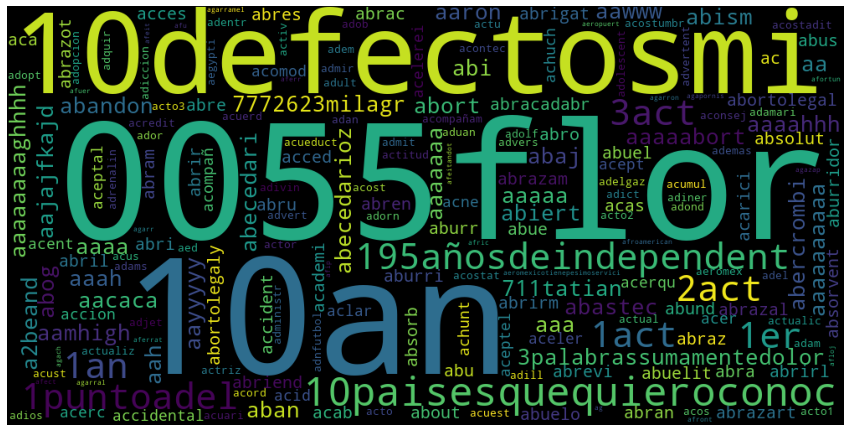

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_could_dict=Counter(df_c_vec.columns)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df_c_vec

features = X.columns

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['comp_1', 'comp_2'])

principalDf["is_humor"] =y_train.values




q1 = principalDf['comp_1'].quantile(0.90)
principalDf = principalDf[principalDf['comp_1'] < q1]

q2 = principalDf['comp_2'].quantile(0.90)
principalDf = principalDf[principalDf['comp_2'] < q2]

finalDF = principalDf.copy()
finalDF.head()

,comp_1,comp_2,is_humor
0,-0.406979,-0.089766,1
1,-2.404708,-0.058203,0
2,3.598878,-0.147383,0
3,5.622539,0.802331,0
4,-2.406243,-0.054307,0


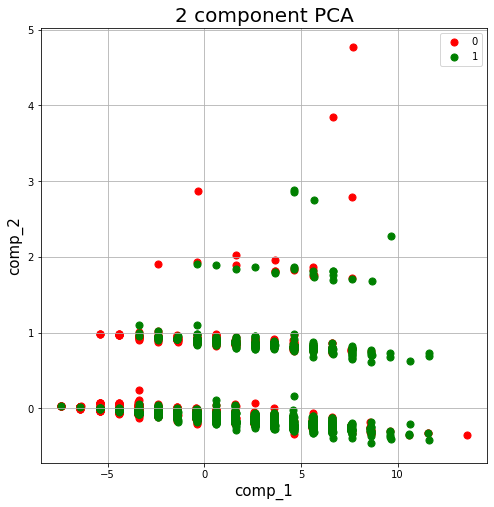

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('comp_1', fontsize = 15)
ax.set_ylabel('comp_2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['is_humor'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'comp_1']
               , finalDF.loc[indicesToKeep, 'comp_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()